# Importing Dependencies

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

# Load the File

In [108]:
df = pd.read_csv('/content/drive/MyDrive/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Preprocessing

In [109]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']

# Exploration

### Distribution

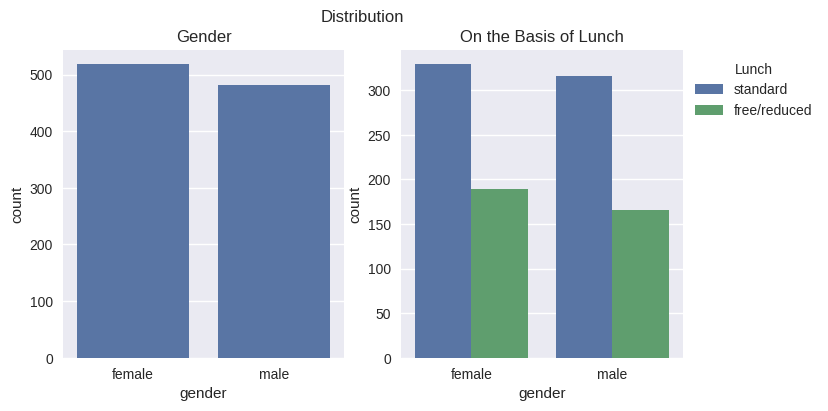

In [124]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (8,4))
sns.countplot(data = df, x = 'gender', ax = ax1)
ax1.set_title('Gender')

sns.countplot(data = df, x = 'gender', hue ='lunch', ax = ax2)
ax2.legend(title='Lunch', loc='upper left', bbox_to_anchor=(1, 1))
ax2.set_title('On the Basis of Lunch')
plt.suptitle('Distribution')
plt.show()

### Which Group Score the most ?

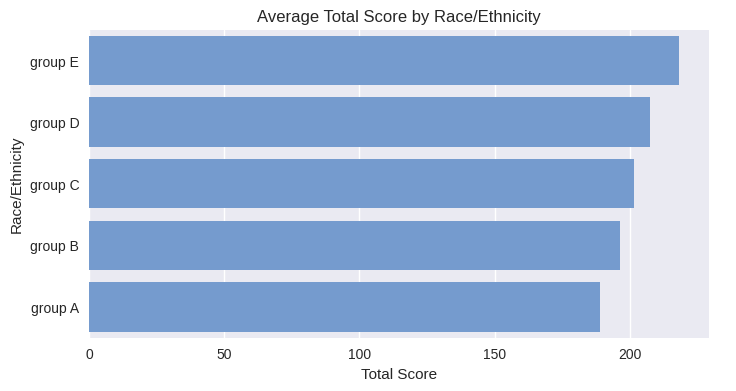

In [120]:

# Calculate mean total score by race/ethnicity
racedf = df.groupby(['race/ethnicity'], as_index=False)['total_score'].mean().sort_values(by='total_score', ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(data=racedf, x='total_score', y='race/ethnicity', color="#69d", ax=ax)

# Add a vertical dashed line at x = 100

# Set plot title and labels
ax.set_title('Average Total Score by Race/Ethnicity')
ax.set_xlabel('Total Score')
ax.set_ylabel('Race/Ethnicity')

# Show the legend
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


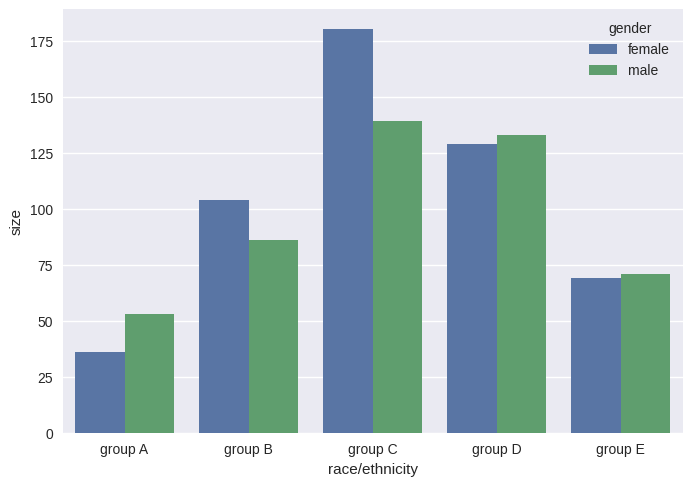

In [117]:
racegender = df.groupby(['race/ethnicity','gender'], as_index = False).size()
sns.barplot(racegender, x = 'race/ethnicity',y = 'size', hue = 'gender')
#plt.axhline(racegender['size'].mean(), linestyle = '--', color = 'black')
plt.show()

#### Group E scored the most while having second lowest genders counts and groupby a has lowest genders. So, because of this they are at lowest. group c is median.

### Why Group E scored the most while having second lowest gender counts ?

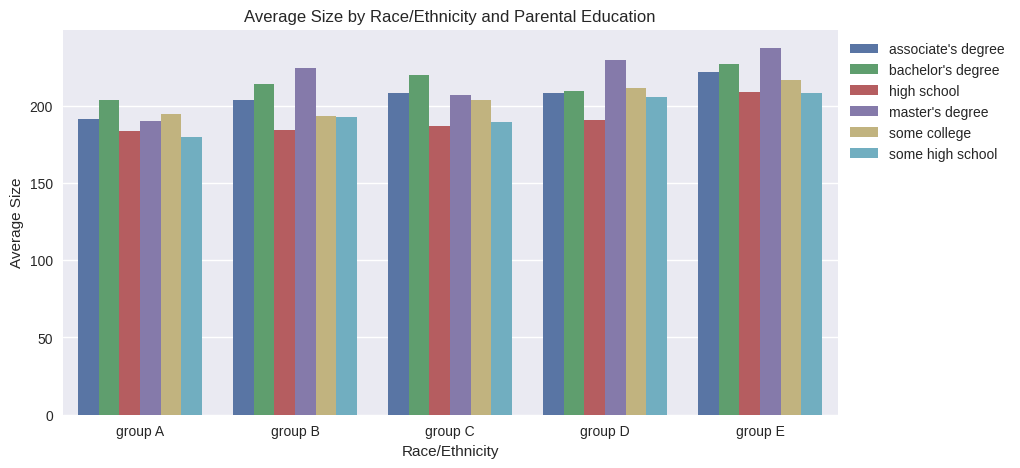

In [119]:
parental = df.groupby(['race/ethnicity', 'parental level of education'], as_index=False)['total_score'].mean()

# Create the stacked bar plot
plt.figure(figsize=(10, 5))
sns.barplot(data=parental, x='race/ethnicity', y='total_score', hue='parental level of education', errorbar=None)

# Customize the plot
plt.title('Average Size by Race/Ethnicity and Parental Education')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Average Size')
plt.legend(title='Parental Education', loc='upper right', bbox_to_anchor=(1, 1))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
# Display the plot
plt.show()


#### This shows the group E parent are strict and help their children for study as followed by Group D and Group C is median. Parents who has master degree. it increase thier chances of getting better marks. This partly truth that parent education and Student marks are coorelated.

### How to Increase Student marks ?

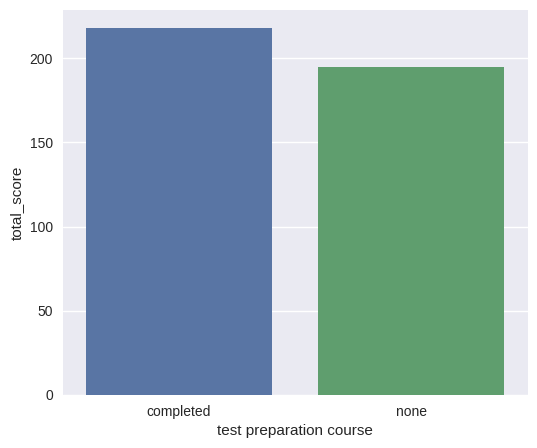

In [115]:
testdf = df.groupby(['test preparation course'], as_index = False)['total_score'].mean()

#plot
fig, ax = plt.subplots(figsize = (6,5))
sns.barplot(testdf, x = 'test preparation course', y = 'total_score',legend=False, hue = 'test preparation course')
plt.show()

#### Those Student who completed test preparation course are more likely to score the higher marks. as compared to student who not taken test prepartion course.

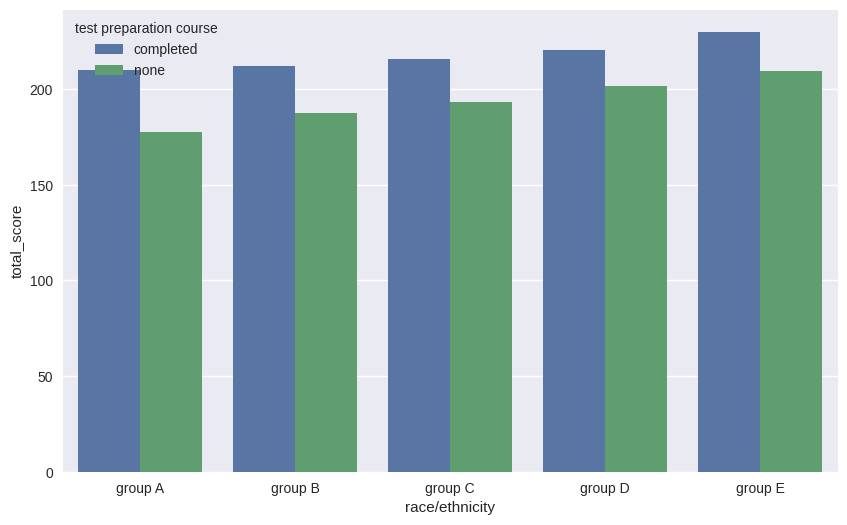

In [116]:

racetest = df.groupby(['test preparation course','race/ethnicity'], as_index = False)['total_score'].mean()

#plot
fig, ax = plt.subplots(figsize = (10,6))
sns.barplot(racetest, x = 'race/ethnicity', y = 'total_score', hue = 'test preparation course')
plt.show()

#### This Show the Group E student taken the most test preparation course and score the highest and on the other hand Group A student taken less test preparation course that.s why they score the lowest.